# Nx versus T and OA

In [1]:
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
import useful_scit.util.log as log
log.ger.setLevel(log.log.INFO)
import time

import seaborn as sns
import matplotlib.pyplot as plt

 from pathlib import Path 
 Path(path).mkdir(exist_ok=True, parents=True)
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/data_info/area_defs.csv


In [2]:
import numpy as np

In [3]:

import numpy as np
from matplotlib import cm

from sklearn.linear_model import LinearRegression, BayesianRidge
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cols = [
    #'#ffff33',
    '#0074c3',
    '#eb4600',
    '#f8ae00',
    '#892893',
    '#66ae00',
    '#00c1f3',
    '#b00029',
]

my_cmap = ListedColormap(cols)

In [4]:
plot_path = Path('Plots')

In [5]:
def make_fn_scat(case, v_x, v_y):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'scat_{case}_{_x}_{_y}.png'
    return plot_path /f

In [6]:
plot_path.mkdir(exist_ok=True, parents=True)

# Load observational data: 

In [7]:
import pandas as pd

In [8]:
from bs_fdbck.constants import measurements_path

In [9]:
fn = measurements_path /'SourceData_Yli_Juuti2021.xls'

df_hyy_1 = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(6))

df_hyy_1.head()

df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )

Importing files: 
[PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20120101000000.20181205100800.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20130101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20140101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20150101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20160101000000.2022022

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:120: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_JA.mean()
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:123: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_JA.median())


N50     1414.990567
N80      818.930198
N100     704.766711
N150     342.910596
N200     177.021711
N250      86.669283
N300      34.127077
JA         1.000000
dtype: float64


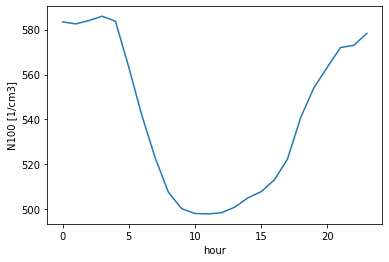

In [10]:
from bs_fdbck.util.EBAS_data import get_ebas_dataset_with_Nx, get_ebas_dataset_Nx_daily_JA_median_df



#ds_ebas_Nx = get_ebas_dataset_with_Nx()

df_ebas_Nx, ds_ebas_Nx = get_ebas_dataset_Nx_daily_JA_median_df()

### Yearly medians:


In [11]:
fn = measurements_path /'SourceData_Yli_Juuti2021.xls'

df_hyy_1y = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(7,12),nrows=7)

df_hyy_1y.head()
df_hyy_1y= df_hyy_1y.rename({'year.1':'year',
                            'T (degree C).1':'T (degree C)',
                             'OA (microgram m^-3).1':'OA (microgram m^-3)',
                             'N100 (cm^-3).1':'N100 (cm^-3)'
                            }, axis=1)
#df_hyy_1y['year'] = pd.to_datetime(df_hyy_1y['year'].apply(x:str(x)))

df_hyy_1y

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/excel/_base.py:1272: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  return self._reader.parse(


,year,T (degree C),OA (microgram m^-3),N100 (cm^-3)
0,2012,14.819834,2.286611,485.015920
1,2013,16.061833,2.266324,458.851509
2,2014,18.469334,4.102861,706.239261
3,2015,14.949500,2.167607,499.026618
4,2016,13.959500,1.693031,418.417730
5,2017,13.619333,1.845648,409.297699
6,2018,17.848833,3.366803,770.183131


In [12]:
df_hyy_1y['year'] = df_hyy_1y['year'].apply(lambda x:f'{x:.0f}')

df_hyy_1y['date'] = df_hyy_1y['year']
df_hyy_1y = df_hyy_1y.set_index('date')

df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )


df_hyy_1 = df_hyy_1.set_index('date')

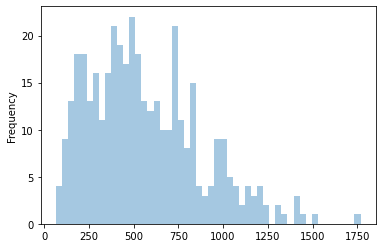

In [13]:
df_hyy_1['N100 (cm^-3)'].plot.hist(bins=50, alpha=0.4, label='obs')

plt.show()



## Why is my method 20% off their method? Is it integration?

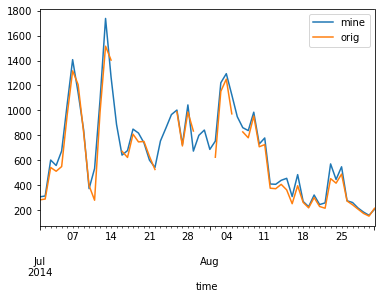

In [14]:

df_joint_hyy = pd.merge(df_ebas_Nx, df_hyy_1, left_index=True, right_index=True)# right_on='date', left_on='time')
(1.2**(-1)*df_joint_hyy['N100']).loc['2014-07':'2014-09'].plot(label='mine')
(df_joint_hyy['N100 (cm^-3)']).loc['2014-07':'2014-09'].plot(label='orig')
plt.legend()
plt.show()

# Read in model data:

## Settings:

In [15]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [16]:
from_t = '2011-01-01'
to_t = '2015-01-01'

## Cases:

In [17]:
cases_inc_Y = ['OsloAero_intBVOC_f19_f19_mg17_incY_full']#'SECTv21_ctrl_def','SECTv11_noresm2_ctrl', 'SECTv11_ctrl_fbvoc','SECTv11_noresm2_adj','SECTv11_noresm2_eq18']#'SECTv11_noresm2_NFHIST']#'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']#,'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']
cases_orig = ['OsloAero_intBVOC_f19_f19_mg17_full']#, 'noSECTv21_ox_ricc']#'noSECTv11_noresm2_ricc', 'noSECTv11_noresm2_ctrl', 'noSECTv11_ctrl_fbvoc','noSECTv11_ctrl']#'noSECTv11_noresm2_NFHIST']#'noSECTv11_ctrl_fbvoc'] #/no SECTv11_ctrl
cases_inc_Y = ['OsloAero_intBVOC_f19_f19_mg17_incY_full']#'SECTv21_ctrl_def','SECTv11_noresm2_ctrl', 'SECTv11_ctrl_fbvoc','SECTv11_noresm2_adj','SECTv11_noresm2_eq18']#'SECTv11_noresm2_NFHIST']#'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']#,'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']
cases_orig = ['OsloAero_intBVOC_f19_f19']#, 'noSECTv21_ox_ricc']#'noSECTv11_noresm2_ricc', 'noSECTv11_noresm2_ctrl', 'noSECTv11_ctrl_fbvoc','noSECTv11_ctrl']#'noSECTv11_noresm2_NFHIST']#'noSECTv11_ctrl_fbvoc'] #/no SECTv11_ctrl

In [18]:
case_mod = cases_orig[0]

In [19]:
 
log.ger.info(f'TIMES:****: {from_t} {to_t}')

2022-04-11 12:17:27,113 useful_scit  INFO     TIMES:****: 2011-01-01 2015-01-01


2022-04-11 12:17:27,113 useful_scit  INFO     TIMES:****: 2011-01-01 2015-01-01


In [20]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T',
       'NCONC01','N50','N150','N200',
      
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

In [21]:
for case_name in cases_inc_Y:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')
for case_name in cases_orig:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

UUUPS
UUUPS


In [22]:
dic_ds = dict()
for ca in cases_orig + cases_inc_Y:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-04-11 12:17:27,260 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/N100_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD500_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD440_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/ACTREL_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/H2SO4_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocate

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/N100_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD500_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD440_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/ACTREL_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/H2SO4_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/SOA_LV_OsloAero_int

2022-04-11 12:17:32,236 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/N100_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/DOD500_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/DOD440_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/ACTREL_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/H2S

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/N100_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/DOD500_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/DOD440_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/ACTREL_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/H2SO4_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_20

# Functions:

In [23]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9

In [24]:

def get_dic_df_mod(model_lev_i=-1):
    dic_df = dict()
    dic_df_sm = dict()

    for ca in dic_ds.keys():
        ds = dic_ds[ca]
        ds_sel = ds.sel(station='SMR').isel( lev=model_lev_i)
        rho = pressure*100/(R*ds_sel['T'])
    
        ds_sel['rho'] = rho.load()
        df = ds_sel.to_dataframe()
        ls_so4 = [c for c in df.columns if 'SO4_' in c]#['SO4_NA']

        for s in ['SOA_NA','SOA_A1','OM_AC','OM_AI','OM_NI']+ls_so4:
            un = '$\micro$g/m3'
            if ds_sel[s].attrs['units']!=un:
                ds_sel[s] = ds_sel[s]*ds_sel['rho']*kg2ug
                ds_sel[s].attrs['units']=un

        df = ds_sel.to_dataframe()
        df = df.drop([co for co in df.columns if (('lat_' in co)|('lon_' in co))], 
                     axis=1)

        df['SOA'] = df['SOA_NA'] + df['SOA_A1']

        df['OA'] = df['SOA_NA'] + df['SOA_A1'] +df['OM_AC']+df['OM_AI']+df['OM_NI']
        df['POA'] = df['OM_AC']+df['OM_AI']+df['OM_NI']
    
        df['SO4']=0
        for s in ls_so4:
            print(s)
            
            print(df[s].mean())
            df['SO4'] = df['SO4'] + df[s]
    
    
        df_daily = df.resample('D').median()

        months = (df_daily.index.month==7 )|(df_daily.index.month==8  )

        df_s = df_daily[months]
        df_s.loc[:,'year'] = df_s.index.year.values

        df_s.loc[:,'T_C'] = df_s['T'].values-273.15
        df_s.index = df_s.index.rename('date')
        df_merge = pd.merge(df_s, df_hyy_1, right_on='date', left_on='date')
        
        df_merge['year'] = df_merge.index.year

        
        dic_df[ca] = df_merge
        print(ca)
    
        months = (df.index.month==7 )|(df.index.month==8  )

        df_s = df[months]
        df_ym = df_s.resample('Y').median()
        df_ym.loc[:,'year'] = df_ym.index.year.values

        df_ym.loc[:,'T_C'] = df_ym['T'].values-273.15
        
        dic_df_sm[ca] = df_ym
        print(ca)
    return dic_df_sm, dic_df


dic_df_sm, dic_df = get_dic_df_mod(model_lev_i=-1)

SO4_A1
0.17030063
SO4_A2
0.5390032
SO4_AC
0.006460039
SO4_NA
0.026009653
SO4_PR
0.06095547
OsloAero_intBVOC_f19_f19
OsloAero_intBVOC_f19_f19


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


SO4_A1
0.18032677
SO4_A2
0.54649395
SO4_AC
0.006369377
SO4_NA
0.02338407
SO4_PR
0.062364608
OsloAero_intBVOC_f19_f19_mg17_incY_full
OsloAero_intBVOC_f19_f19_mg17_incY_full


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [25]:
col_dic = {}
for y,c in zip(range(2012, 2019), cols):
    col_dic[y] =c

In [26]:
def plot_scatter(v_x,v_y, df_s, df_sy,ca, 
                 xlims=None, 
                 ylims=None,
                 xlab = None,
                 ylab = None,
                 figsize=[6,5],
                 ax = None,
                 #fig = None
                ):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig = ax.get_figure()
    #for y,co in zip(df_s['year'].unique(), cols):
    
    #    _df = df_s[df_s['year']==y]
    _cols = [col_dic[int(y)] for y in df_s['year'].unique()]
    _my_cmap = ListedColormap(_cols)
    df_s.plot.scatter(x=v_x,y=v_y, ax=ax, 
                      c = 'year',
                      cmap = my_cmap, 
                      vmax=2018.5, vmin=2011.5)#, label=y )#, c='year', cmap='Paired')
    #df_sy = df_s.resample('Y').median()
    if df_sy is not None:
        for y,co in zip(df_sy['year'].unique(), cols):
            #df_sy = dic_df_sm[ca]
            co = col_dic[int(y)]
            _dfm = df_sy[df_sy['year']==y]
            
            #_dfm = _df.median()
            ax.scatter(_dfm[v_x],_dfm[v_y],c=co, label='__nolegend__' , marker='s', s=200, edgecolor='k')
    
    _df_s = df_s[df_s[v_x].notnull() & df_s[v_y].notnull()]
    x = np.array(_df_s[v_x].values).reshape(-1,1)
    y=np.array(_df_s[v_y].values).reshape(-1,1)

    model = LinearRegression().fit(x,y)

    r_sq = model.score(x, y)
    print('coefficient of determination:', r_sq)

    print('intercept:', model.intercept_)

    print('slope:', model.coef_)
    x_s = np.linspace(x.min(),x.max(),10)
    a = model.coef_[0]
    b = model.intercept_[0]
    if b<0:
        sig = ''
    else:
        sig='+'
    if a<1:
        
        lab = r'fit: $y= %.3fx%s%.3f$, r$^2$=%.02f' %(a,sig,b, r_sq)
    elif a>10:
        lab = r'fit: $y= %.1fx%s%.1f$, r$^2$=%.02f' %(a,sig,b, r_sq)
    elif a>100:
        lab = r'fit: $y= %.0fx%s%.0f$, r$^2$=%.02f' %(a,sig,b, r_sq)
    else:
        lab = r'fit: $y= %.2fx%s%.2f$, r$^2$=%.02f' %(a,sig,b, r_sq)
        
        
    ax.plot(x_s, (a*x_s + b), c='k')
    plt.legend(frameon=False, bbox_to_anchor=(1,1,))
    #ax.hlines(2000, 5,30, color='k', linewidth=1)

    ax.set_ylim(ylims)
    ax.set_xlim(xlims)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)


    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    custom_lines = [
        Line2D([0], [0],  color='#0074c3',marker='s',markeredgecolor='k',markersize=10, linewidth=0),
        Line2D([0], [0], color='#0074c3',marker='o', linewidth=0),
        Line2D([0], [0], color='k', lw=1),
                #Patch( color='b', lw=4),
               # Line2D([0], [0], color=cmap(1.), lw=4)
               ]

    ax.legend(custom_lines, ['Daily median', 'Summer median',lab,],frameon=False,
          loc='upper left')
    return fig, ax

In [27]:
mask_obs_N = dic_df[ca]['N100 (cm^-3)'].notnull()
mask_obs_OA = dic_df[ca]['OA (microgram m^-3)'].notnull()

# Plots

## N50

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.8328507034303773
intercept: [1941.7793]
slope: [[331.74738]]
coefficient of determination: 0.7709916808287978
intercept: [907.58154]
slope: [[529.24335]]
coefficient of determination: 0.1494193317720789
intercept: [1117.15524054]
slope: [[108.43154659]]


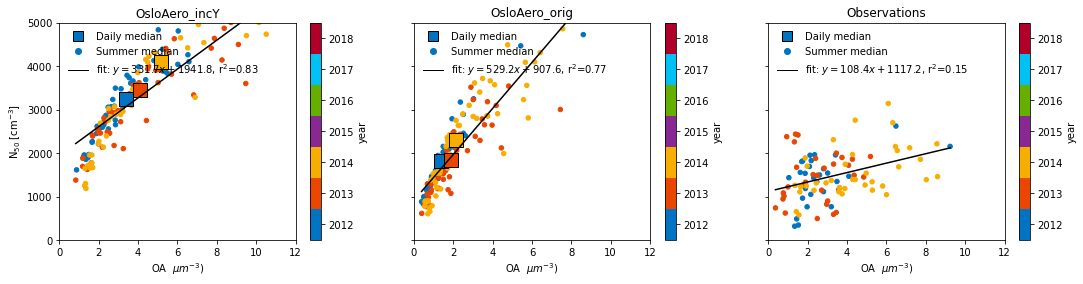

In [44]:

fig, axs = plt.subplots(1,3, figsize=[18,4], sharey=True,)
v_x = 'OA'

v_y = 'N50'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]

ylims = [0,5000]
xlab = 'OA  $\mu m^{-3}$)'

ylab = r'N$_{50}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_incY')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[1],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_x = 'OA (microgram m^-3)'

ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')


plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.6839339121581274
intercept: [-2265.696]
slope: [[332.03027]]
coefficient of determination: 0.6380766728370348
intercept: [-1930.2119]
slope: [[221.40747]]
coefficient of determination: 0.1952169986448774
intercept: [145.27769336]
slope: [[78.15991789]]


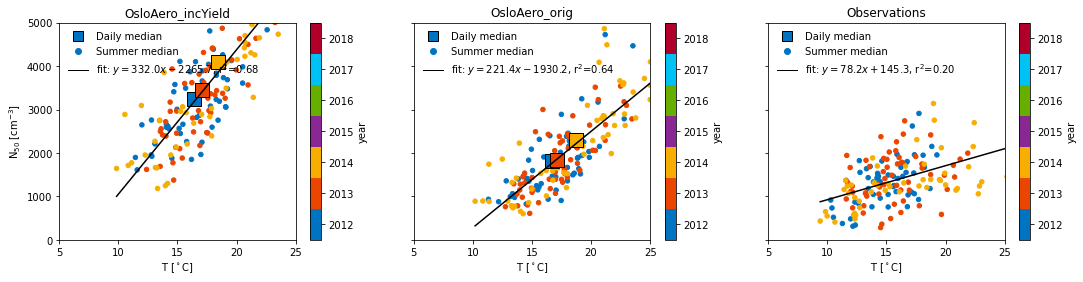

In [45]:

fig, axs = plt.subplots(1,3, figsize=[18,4], sharey=True,)
v_x = 'T_C'

v_y = 'N50'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,25]

ylims = [0,5000]
# xlab = 'OA  $\mu m^{-3}$)'
xlab = r'T [$^\circ$C]'

ylab = r'N$_{50}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_incYield')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[1],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_x = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')


plt.show()

## N100

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.9490169148681227
intercept: [97.04175]
slope: [[289.30765]]
coefficient of determination: 0.9164003522936404
intercept: [0.73669434]
slope: [[286.4938]]
coefficient of determination: 0.6416074440340103
intercept: [279.37412455]
slope: [[163.38389315]]


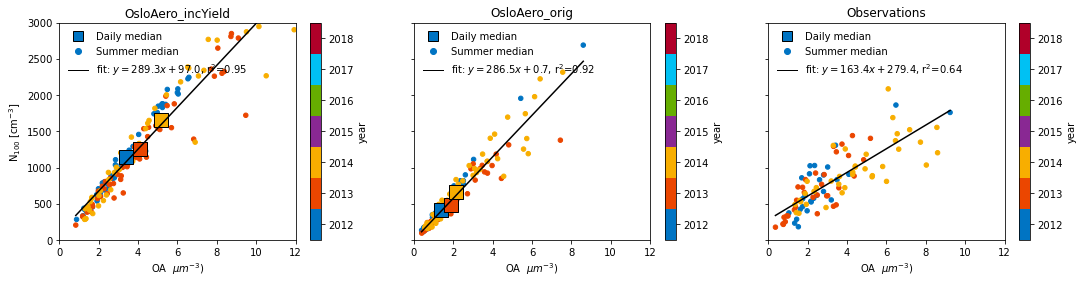

In [46]:

fig, axs = plt.subplots(1,3, figsize=[18,4], sharey=True,)
v_x = 'OA'

v_y = 'N100'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]

ylims = [0,3000]
xlab = 'OA  $\mu m^{-3}$)'

ylab = r'N$_{100}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_incYield')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[1],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_x = 'OA (microgram m^-3)'

ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')


plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.5651607988008802
intercept: [-2825.8704]
slope: [[246.57877]]
coefficient of determination: 0.5225424556311591
intercept: [-1176.73]
slope: [[99.485245]]
coefficient of determination: 0.47792429181843366
intercept: [-608.55471592]
slope: [[84.1307772]]


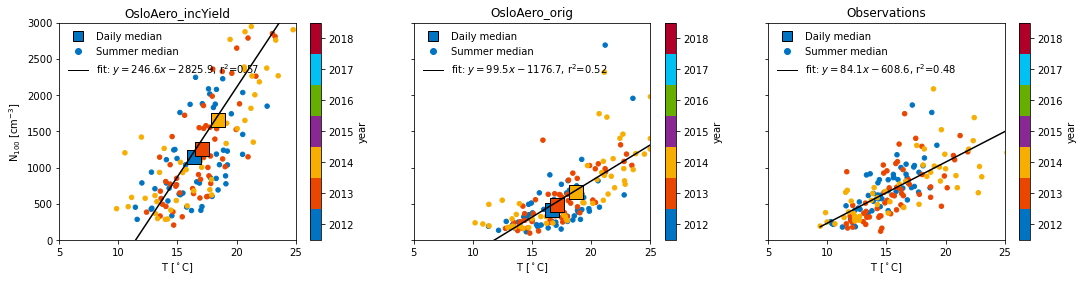

In [47]:

fig, axs = plt.subplots(1,3, figsize=[18,4], sharey=True,)
v_x = 'T_C'

v_y = 'N100'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,25]

ylims = [0,3000]
# xlab = 'OA  $\mu m^{-3}$)'
xlab = r'T [$^\circ$C]'

ylab = r'N$_{100}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_incYield')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[1],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_x = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')


plt.show()

## N150

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.975533786017302
intercept: [-116.88788]
slope: [[102.11324]]
coefficient of determination: 0.9614450329605492
intercept: [-19.533447]
slope: [[82.506134]]
coefficient of determination: 0.8296521290099407
intercept: [65.27716196]
slope: [[118.10385116]]


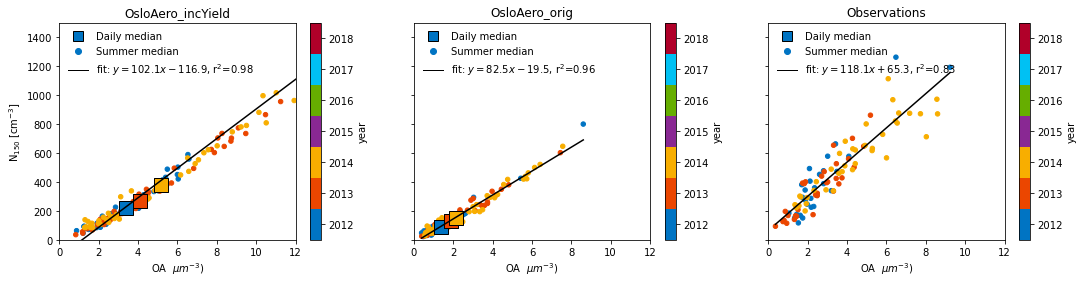

In [48]:

fig, axs = plt.subplots(1,3, figsize=[18,4], sharey=True,)
v_x = 'OA'

v_y = 'N150'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]

ylims = [0,1500]
xlab = 'OA  $\mu m^{-3}$)'

ylab = r'N$_{150}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_incYield')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[1],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_x = 'OA (microgram m^-3)'

ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')


plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.44199369793514687
intercept: [-955.46234]
slope: [[75.912926]]
coefficient of determination: 0.3755006724493575
intercept: [-271.64594]
slope: [[23.711256]]


No handles with labels found to put in legend.


coefficient of determination: 0.4887325116056471
intercept: [-430.25440021]
slope: [[52.0645842]]


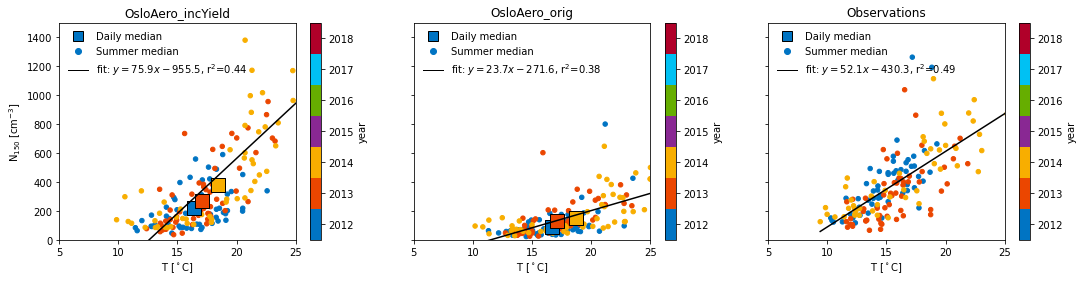

In [49]:
fig, axs = plt.subplots(1,3, figsize=[18,4], sharey=True,)
v_x = 'T_C'

v_y = 'N150'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,25]

ylims = [0,1500]
# xlab = 'OA  $\mu m^{-3}$)'
xlab = r'T [$^\circ$C]'

ylab = r'N$_{150}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_incYield')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[1],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_x = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')


plt.show()

## N200

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.9189734967117982
intercept: [-33.080315]
slope: [[28.869106]]
coefficient of determination: 0.8535236422258128
intercept: [-1.9994392]
slope: [[27.846308]]
coefficient of determination: 0.8685484983897379
intercept: [13.97305658]
slope: [[72.04169108]]


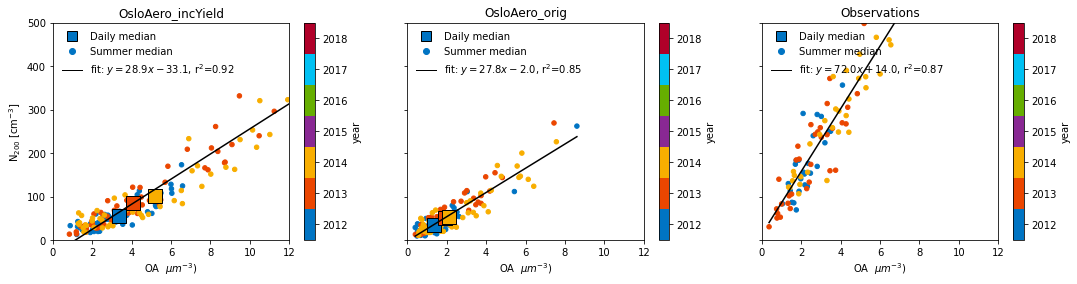

In [50]:

fig, axs = plt.subplots(1,3, figsize=[18,4], sharey=True,)
v_x = 'OA'

v_y = 'N200'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]

ylims = [0,500]
xlab = 'OA  $\mu m^{-3}$)'

ylab = r'N$_{200}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_incYield')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[1],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_x = 'OA (microgram m^-3)'

ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')


plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.35413035714910723
intercept: [-241.177]
slope: [[19.792927]]
coefficient of determination: 0.2488826152066459
intercept: [-67.93106]
slope: [[6.914843]]
coefficient of determination: 0.44523163929400333
intercept: [-245.53994181]
slope: [[29.14064356]]


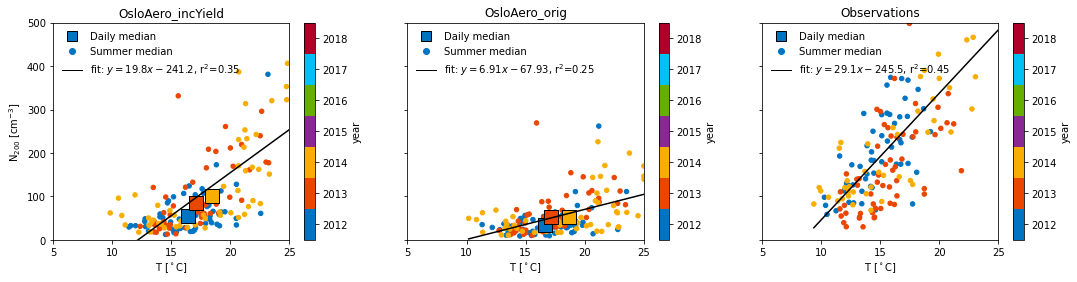

In [51]:
fig, axs = plt.subplots(1,3, figsize=[18,4], sharey=True,)
v_x = 'T_C'

v_y = 'N200'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,25]

ylims = [0,500]
# xlab = 'OA  $\mu m^{-3}$)'
xlab = r'T [$^\circ$C]'

ylab = r'N$_{200}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_incYield')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[1],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_x = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')


plt.show()

## The end
